In [1]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
import plotly.offline as pyo
import ipywidgets as widgets


In [2]:
#@title Load Data
df = pd.read_csv("/content/drive/My Drive/IEEEBigMM/#METOO/DATASETS/Train/train.csv")

#### Analysis

In [3]:
#@title Country wise tweets analysis
Country = "Australia" #@param ["Australia","Austria","Canada","India","New_Zealand","Sweden","UAE","UK","USA"]
data = df[['Directed_Hate','Generalized_Hate','Sarcasm','Allegation','Justification','Refutation','Support','Oppose','Country']]
data = data.groupby(['Country']).agg('sum').reset_index()
data = data[data['Country'] == Country]
data = pd.melt(data, id_vars = ['Country'], var_name = 'label').sort_values('value')
fig = go.Figure([go.Bar(y=list(data['label']), x=data['value'],orientation='h')])
fig.update_layout(
    title = {
        'text': 'Tweets analysis in {}'.format(Country),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 26,
            
        },
    yaxis_title = "Labels",
    xaxis_title = "Number of tweets"
)
fig.show()

In [4]:
#@title Countries stacked plot
data = df[['Directed_Hate','Generalized_Hate','Sarcasm','Allegation','Justification','Refutation','Support','Oppose','Country']]
data = data.groupby(['Country']).agg('sum').reset_index()
data = pd.melt(data, id_vars = ['Country'], var_name = 'label').sort_values('value')
data = data.pivot(index='label', columns='Country', values='value')
column = list(data.columns)
data['total'] = data.sum(axis=1)
for col in column:
  data[col] = [(i/j)* 100 for i,j in zip(data[col], data['total'])]
data = data.drop('total',axis=1)
da = []
for col in column:
  da.append(go.Bar(
            name=col,
            y=data.index,
            x=data[col],
            orientation='h'))
fig = go.Figure(
    data=da,
)
fig.update_layout(
    title = {
        'text': 'Country Analysis',
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
      barmode='stack',
    yaxis=dict(tickangle=0, title='Labels'),

    yaxis_title = "Labels"
)
fig.show()

In [6]:
#@title Tweets analysis
data = df[['Directed_Hate','Generalized_Hate','Sarcasm','Allegation','Justification','Refutation','Support','Oppose']]
data = pd.melt(data,var_name='label').groupby('label').agg('sum').sort_values('value')
fig = go.Figure([go.Bar(y=list(data.index), x=data['value'],orientation='h')])
fig.update_layout(
    title = {
        'text': 'Tweets analysis',
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 26,
            
        },
    yaxis_title = "Labels",
    xaxis_title = "Number of tweets"
)
fig.show()

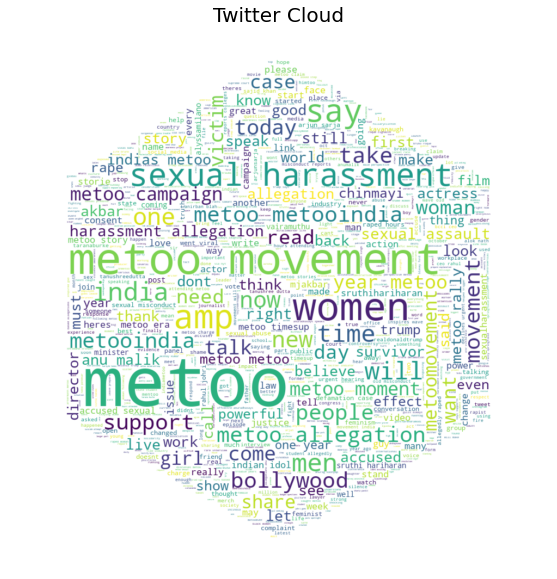

In [16]:
#@title Word Cloud
tweets = ''.join(df['tweet'])
no_links = re.sub(r'http\S+', '', tweets)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]
mask = np.array(Image.open('/content/drive/My Drive/IEEEBigMM/#METOO/3.jpeg'))
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)
f = plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Cloud', size=20)
plt.axis("off")
plt.show()